# Sistemas de Recomendación


# 1. Introducción

Los sistemas de recomendación son una de las aplicaciones más comunes y más fácilmente comprensibles dentro del aprendizaje máquina y el análisis de datos o *data science*.

A partir de la información de los usuarios y los contenidos (o items) y las preferencias o gustos que los usuarios tienen por los diferentes contenidos, los sistemas de recomendación realizan predicciones sobre el interés que un usuario puede tener sobre nuevos productos que puedan ser de utilidad o interés para él. Esto es lo que se denomina **recomendaciones personalizadas**.

Debido a la gran cantidad de información que nos rodea, muchas empresas han optado por incluir estos sistemas dentro de los servicios que proporcionan al usuario para hacer frente a la sobrecarga de información y proporcionar al usuario recomendaciones, contenidos y/o servicios personalizados.

Algunos de ejemplos de estos sistemas, con los que ya convivimos de maneral natural, los encontramos en:

1. **AMAZON**

El gigante de compras por Internet incorpora en su web un algoritmo personalizado de recomendación. Cuando un usuario se interesa por un producto, el sistema le recomienda un listado de productos que también pueden ser de su interes e, incluso, a partir del historial de compras genera una lista de productos que también le pueden interesar...

<img align="center" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/SR/Amazon.png" width=60%>


El objetivo de este sistema es  conseguir aumentar las ventas. De hecho, Amazon ha declarado que el 30% de sus ventas medio son generadas por recomendaciones.

¿En qué se basa Amazon para generar esta lista personalizada de recomendaciones? ¿Y cómo lo hace de manera eficiente con la gran cantidad de usuarios y productos que tiene que manejar?

La idea es bastante sencilla, Amazon va generando por cada producto una lista de productos similares que pueden resultar de interes junto con este producto. Para ello, analiza los productos que los usuarios han adquirido en un mismo pedido, o añadido al carrito de la compra o, simplemente, almacenados en una *wish-list*.

Amazon no mira las caracteristias de los productos para ver si un producto es similar a otro, sino que analiza las preferencias de los usuarios por los productos para generar estas similitudes. Es decir si un usuario compra un Ipad y conjuntamente una funda, cuando un nuevo usuario compre el Ipad, Amazon le recomendará comprar la funda. Esto es lo que se conoce como sistemas de recomendación basados en **filtrado colaborativo**.


2. **SPOTIFY**

Spotify no solo nos da una plataforma de acceso a toda la música que queremos escuchar con gran facilidad y velocidad, sino que desde 2015 ofrece una lista semanal con recomendaciones personalizadas.

<img align="center" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/SR/Spotify.png" width=60%>

En este caso el objetivo no es aumentar las ventas, sino fidelizar usuarios evitando que estos se cansen de escuchar siempre lo mismo. De hecho, Spotify declara que el 70% de sus reproduciones vienen de estas recomendaciones.

Para diseñar este sistema de recomendación, Spotify combina 3 modelos de recomendación:
1. Modelos de Filtrado Colaborativo: analizan los gustos de los usuarios para recomendar canciones similares.
2. Modelos de Procesamiento del Lenguaje Natural: analizan la información disponible en Internet sobre los grupos y/o canciones para detectar tendencias.
3. Modelos de audio: analizan las pistas de audio en bruto para buscar similtudes entre generos musicales que ayuden a mejorar las recomendaciones.

La combinación de estos 3 modelos da lugar al recomendador de Spotify, que ha consegido la fidelización de muchos clientes.

3. **NETFLIX**



Netflix también incluye un sistema de recomendaciones personalizadas para ayudar al usuario a encontrar series y películas que le interesen.

<img align="center" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/SR/netflix.jpg" width=60%>

Para diseñar este sistema Netflix utiliza la información que dispone de los usuarios y del contenido:
* Historial de visualización y valoración del contenido ya visto.
* Gustos y preferencias de otros usuarios del sistema.
* Información sobre el contenido: títulos, género, categorías, actores, año de estreno, etc.
* Comportamiento del usuario: hora del día en que ve Netflix, dispositivos, tiempo que utiliza el sistema.

Todos estos datos alimentan al sistema de recomendación para que, combinando esquemas basados en filtrado colaborativo y otros basados en información del contenido y del usuario, pueda dar recomendaciones personalizadas a los usuarios.

# 2. Información de partida: la base de datos

Para el diseño de los sistemas de recomendación se suele disponer de la siguiente información:

* Metadatos o **información** descriptiva **de los contenidos**.
* **Información** sociodemográfica **de los usuarios**.
* **Puntuaciones** o evaluación de los usuarios a los contenidos. Estas puntuaciones pueden ser de manera explícita o implícita:
  - Información explícita: cuando el usuario ha valorado un contenido dando una puntuación concreta (por ejemplo, un valor en una escala de 1 a 5).
  - Información implícita: en algunas aplicaciones es muy complicado pedirle al usuario que realice votaciones de los contenidos; en estos casos, se puede seguir el historial de navegación o de uso del sistema del usuario para saber sus intereses (páginas visitas, contenido previsualizado, número de veces que se escucha una canción...).

La mayor dificultad que nos encontramos para el diseño de estos sistemas es que la mayor parte de esta información no está disponible. De hecho, el objetivo principal de estos sistemas es predecir las puntuaciones que los usuarios darían a contenidos que aún no han valorado.



## **Book-Crossing dataset**

Para esta sesión vamos a trabajar con una base de datos de recomendación de libros: [Book-Crossing](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

Esta base de datos contiene información de 278.858 usuarios (anonimizados pero con información demográfica) que proporcionan 1.149.780 valoraciones de unos 271.379 libros. Esta información se encuentra estructurada en 3 tablas (o ficheros .csv):

* **Tabla de usuarios**: Contiene la información de los usuarios: un identificador y si están disponibles algunos datos demográficos como la localización y la edad. Como esta información se ha anonimizado, los identificadores de los usuarios son números enteros.  
* **Tabla de libros**: Por cada libro se conoce su identificador (en este caso es el ISBN) y  metadatos adicionales como es el título del libro, el autor, el año de publicación y la editorial.
* **Tabla de puntuaciones**: Contiene la información con las valoraciones que los usuarios han hecho de algunos libros. Las puntuaciones son explícitas e implicitas. Las explicitas vienen expresadas en una escala del 1 al 10 (valores más altos que denotan una mayor interés), y las implícitas están indicadas con un valor 0.

Vamos a cargar la base de datos y analizar el contenido en cada una de estas matrices.

### Matriz de puntuaciones

Vamos a empezar cargando la tabla de puntuaciones y analizando cómo se distribuyen sus valores

In [1]:
import pandas as pd
import csv

ruta = '/content/sample_data/BX-Book-Ratings.csv'

# Leer el archivo ignorando líneas mal formateadas, sin interpretar comillas especiales
rating = pd.read_csv(
    ruta,
    sep=';',
    encoding='latin1',
    quoting=csv.QUOTE_NONE,
    on_bad_lines='skip',
    low_memory=False
)

# Renombrar columnas
rating.columns = ['userID', 'bookID', 'bookRating']

# Limpiar comillas de todas las columnas tipo string
for col in rating.columns:
    if rating[col].dtype == 'object':
        rating[col] = rating[col].str.replace('"', '').str.strip()

# Eliminar duplicados
rating.drop_duplicates(inplace=True)
rating['userID'] = pd.to_numeric(rating['userID'], errors='coerce')
rating['bookRating'] = pd.to_numeric(rating['bookRating'], errors='coerce')

# Ver resultado
rating.head()

,userID,bookID,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [2]:
# Check the data table and get some information
print('Número de entradas en la tabla de puntuaciones:',rating.shape[0])
print('Número de usuarios:', len(rating.userID.unique()))
print('Número de libros (items):', len(rating.bookID.unique()))
print('La puntuación máxima es:', rating.bookRating.max())
print('La puntuación mínima es:', rating.bookRating.min())

Número de entradas en la tabla de puntuaciones: 1149780
Número de usuarios: 105283
Número de libros (items): 340553
La puntuación máxima es: 10
La puntuación mínima es: 0


La estructura de esta tabla es una tupla (`userID`, `bookID`, `rating`). La tabla recoge una entrada por cada puntuación emitida. Los usuarios que no han puntuado ningún libro (por ejemplo, nuevos usuarios en el sistema) no tienen ninguna entrada en esta tabla.

Distribución de las puntuaciones: ¿Qué valores de puntuaciones hay? Dibujemos su histograma.

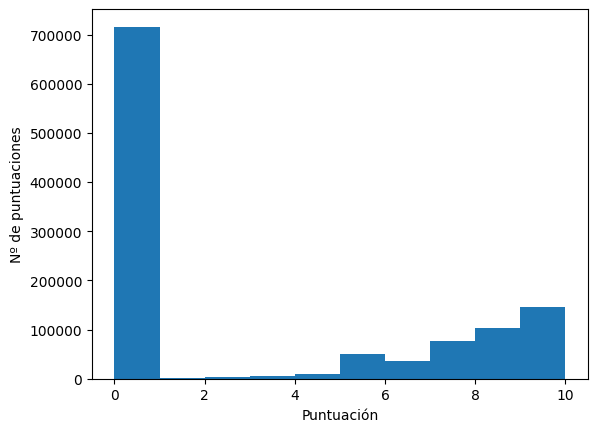

In [3]:
import matplotlib.pyplot as plt

rating_distribution = rating.bookRating
plt.hist(rating_distribution)
plt.ylabel('Nº de puntuaciones')
plt.xlabel('Puntuación')
plt.show()

Podemos ver que la gran mayoría de las puntuaciones (700K de 1200K puntuaciones en total)  las puntuaciones en los datos son 0 (puntuaciones implícitas), y muy pocas puntuaciones son 1, 2 o 3. En general, si un libro alcanza bajas puntuaciones significa que no ha gustado.

¿Cuántos libros ha puntuado cada usuario? Para responder a esta pregunta dibujemos la distribución de puntuaciones por usuario.


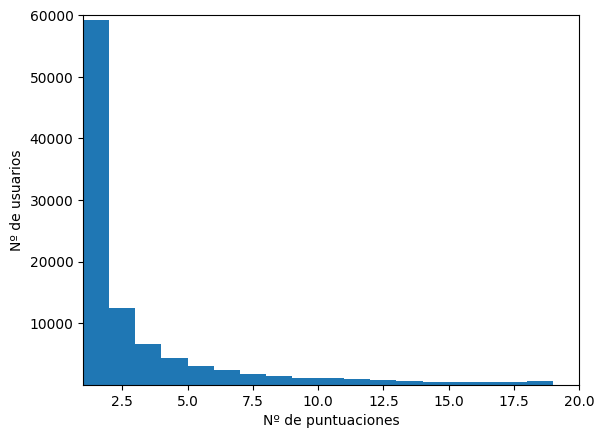

El usuario que más libros ha puntuado, ha puntuado: 13602


In [4]:
# Count the number of entries in the rating matrix by user
Nrating_por_user = rating.userID.value_counts()
plt.hist(Nrating_por_user, range(20))
plt.ylim([1, 60000])
plt.xlim([1, 20])
plt.ylabel('Nº de usuarios')
plt.xlabel('Nº de puntuaciones')
plt.show()


print("El usuario que más libros ha puntuado, ha puntuado:", Nrating_por_user.max())

Vemos que esta distribución tiene muchos valores al principio y luego muestra una larga cola... esto muestra que muchos usuarios han puntuado muy pocos libros y hay pocos usuarios con muchos libros puntuados. Aunque hay un usuario que ha puntuado 13602 libros!!!

¿Y cuántas puntuaciones tenemos por cada libro? Mostremos ahora la distribución the puntuaciones por libro.



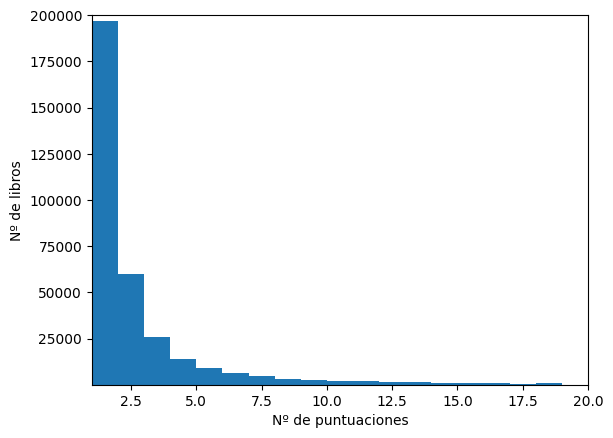

El libro con más puntuaciones tiene: 2502


In [5]:
Nrating_por_book = rating.bookID.value_counts()
plt.hist(Nrating_por_book, range(20))
plt.ylim([1, 200000])
plt.xlim([1, 20])
plt.ylabel('Nº de libros')
plt.xlabel('Nº de puntuaciones')
plt.show()

print("El libro con más puntuaciones tiene:", Nrating_por_book.max())

Ahora vemos una distribución similar donde la mayoría de los libros recibieron menos de 5 puntuaciones, y muy pocos libros tienen muchas puntuaciones, aunque el libro más calificado ha recibido 2.205 puntuaciones.

### Tabla de contenidos (libros)

Analicemos ahora la información de esta tabla.

In [6]:
import pandas as pd
import csv
books = pd.read_csv(
    '/content/sample_data/BX-Books.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',    # Indica que las comillas son sólo de texto
    on_bad_lines='skip',
    low_memory=False
)
books = books[["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication"]]
books.columns = ['bookID', 'title', 'author', 'year']
books['year'] = pd.to_numeric(books['year'], errors='coerce').fillna(0).astype(int)
books.head()

,bookID,title,author,year
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [7]:
books = books.drop_duplicates(subset=['title', 'author', 'year'])

En este caso cada fila de la tabla está asociada a un libro y tiene la información del mismo (ID, título, autor y año).

### Tabla de usuarios

Analicemos ahora la información de la tabla de usuarios

In [8]:
import pandas as pd
import csv

ruta = '/content/sample_data/BX-Users.csv'

# Leer el archivo ignorando líneas mal formateadas, sin interpretar comillas especiales
users = pd.read_csv(
    ruta,
    sep=';',
    encoding='latin1',
    quoting=csv.QUOTE_NONE,
    on_bad_lines='skip',
    low_memory=False
)

# Renombrar columnas
users.columns = ['userID', 'localication', 'age']

# Limpiar comillas de todas las columnas tipo string
for col in users.columns:
    if users[col].dtype == 'object':
        users[col] = users[col].str.replace('"', '').str.strip()

# Eliminar duplicados
users.drop_duplicates(inplace=True)
users['age'] = pd.to_numeric(users['age'], errors='coerce')

# Ver resultado
users.head()

,userID,localication,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Al igual que en la tabla de contenido, cada fila de la tabla está asociada a un usuario y tiene la información del mismo. En este caso su ID, localización y año. Vemos que hay campos no disponibles para algunos usuarios y figuran como `NaN`.

### Preprocesado de datos

Antes de empezar a trabajar con esta base de datos, vamos a filtrar algunos de sus campos en base a dos criterios:

1. Vamos a eliminar las puntuaciones implicitas. La mayoría de los modelos que vamos a ver solo trabajan con puntuaciones explicitas, así que vamos a eliminar las implicitas para facilitar el diseño de los modelos.

2. Para reducir el tamaño del conjunto de datos, y evitar encontrarnos con largas ejecuciones, vamos a filtrar los libros con pocas puntuaciones y los usuarios que han puntuado pocos libros. De hecho, estos usuarios/libros no nos iban a dar buenos resultados, así que al eliminarlos faciliamos el análisis de los métodos que vamos a ver.




In [9]:
print('El tamaño de la matriz de puntuaciones original es:\t{}'.format(rating.shape))
print('El tamaño de la matriz de usuarios original es:\t{}'.format(users.shape))
print('El tamaño de la matriz de libros original es:\t{}'.format(books.shape))

# 1. Remove implicit ratings

rating = rating[rating.bookRating>0]

# 2. Remove users and books with a low number of ratings

min_book_ratings = 50
filter_books = rating.bookID.value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = rating.userID.value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

rating = rating[(rating.bookID.isin(filter_books)) & (rating.userID.isin(filter_users))]
print('El tamaño de la nueva matriz de puntuaciones es:\t{}'.format(rating.shape))

users = users[(users.userID.isin(filter_users))]
print('El tamaño de la nueva matriz de usuarios es:\t{}'.format(users.shape))

books = books[(books.bookID.isin(filter_books))]
print('El tamaño de la nueva matriz de libros es:\t{}'.format(books.shape))

El tamaño de la matriz de puntuaciones original es:	(1149780, 3)
El tamaño de la matriz de usuarios original es:	(278700, 3)
El tamaño de la matriz de libros original es:	(181498, 4)
El tamaño de la nueva matriz de puntuaciones es:	(13716, 3)
El tamaño de la nueva matriz de usuarios es:	(0, 3)
El tamaño de la nueva matriz de libros es:	(496, 4)


# 3. Sistemas de recomendación: ¿qué son y cómo se clasifican?

Como hemos visto, los sistemas de recomendación parten de información sobre  los contenidos (`books`), los usuarios (`users`) y los intereses de los usuarios por algunos de los contenidos (`rating`) para poder predecir el interés de los usuarios por los artículos sin clasificar. En otras palabras, completar los espacios en blanco de la tabla de puntuaciones (`rating`).


En función de la información que usen y cómo se emplee, podemos clasificar los sistemas de recomendación en:

* Modelos basados en **popularidad**: estos sistemas solo consideran la popularidad de los contenidos (en base a puntuaciones de los usuarios, número de ventas,...). Son fáciles de implementar y gozan de cierto nivel de efectividad, pero no son recomendaciones personalizadas (no tienen en cuenta los gustos personales de cada usuario).

* Sistemas **basados en contenido**: se recomienda al usuario artículos similares a los que le gustaban en el pasado: *Muéstrame más de lo mismo que me ha gustado*. Esta similitud entre contenidos se realiza en base a las descripciones y características de los contenidos (información en `books`: título parecido, mismo autor, ...).

* Sistemas **basados en usuarios**: un usuario es recomendado en base a los gustos de usuarios con un perfil sociodemográfico similar (no suele emplearse este enfoque).

* **Filtrado colaborativo**: se recomiendan al usuario elementos que en el pasado gustaban a personas con gustos y preferencias similares. En otras palabras, se recomiendan al usuario elementos puntuados positivamente por los usuarios que suelen coincidir con él.

* **Híbridos**: combinan los esquemas anteriores para explotar las ventajas y limitaciones de los diferentes enfoques.

Dos de las formas más populares de abordar los sistemas de recomendación son el filtrado colaborativo y las recomendaciones basadas en el contenido. En este notebook nos vamos a centrar en los sistemas de filtrado colaborativo (los más habituales); pero antes veamos un par de aproximaciones sencillas para diseñar un sistema basado en popularidad y otro sistema basado en contenido.





## 3.1 Sistemas basados en popularidad

Como ya hemos dicho, uno de los métodos de recomendación más sencillos son los sistemas basados en popularidad. Éstos recomiendan los elementos más importantes en función de una determinada métrica o puntuación (popularidad).

En esta sección, vamos a diseñar uno de estos sistemas para nuestra base de datos de recomendación de libros. Para ello, seguiremos los siguientes pasos:
1. Seleccionar un criterio de popularidad, métrica o puntuación con la que calificar los libros.
2. Calcular la popularidad de cada libro.
3. Ordenar los libros según su popularidad para generar una lista de recomendaciones.


Una de las métricas más sencillas podría consistir en coger el promedio de las puntuaciones asignadas a cada libro o directamente seleccionar los libros con más puntuaciones.

Analicemos estas dos métricas. Para ello, complete los siguientes ejercicios:

**Ejercicio 1**: Calcule la puntuación promedio de cada libro y muestre los 10 libros con mayor puntuación media.

**Ejercicio 2**: Calcule el número de puntuaciones de cada libro y muestre los 10 libros con mayor número de puntuaciones.

Si le resulta útil puede usar las funciones `groupby` y `agg` de los `dataframes` (puede encontrar ayuda [aquí](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) y [aquí](https://pandas.pydata.org/pandas-docs/version/0.23.1/api.html#id39)).

#### Solución

In [10]:
# Get the average rating and the number of ratings by book
book_rating = rating.groupby('bookID', as_index=False)['bookRating'].agg({'meanRating' : 'mean', 'numRating' : 'size'})

# Just for analysis purposes, add title to the previous dataframe
book_rating = pd.merge(book_rating, books[['bookID','title']], on='bookID')

# Show the books with highest mean rating
book_rating = book_rating.sort_values(ascending=False,by=['meanRating'])
book_rating.head(10)

<ipython-input-10-732fe133ef4a>:2: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  book_rating = rating.groupby('bookID', as_index=False)['bookRating'].agg({'meanRating' : 'mean', 'numRating' : 'size'})


,bookID,meanRating,numRating,title
110,0345339738,9.500000,20,"The Return of the King (The Lord of the Rings,..."
235,043936213X,9.437500,16,Harry Potter and the Sorcerer's Stone (Book 1)
56,0156528207,9.357143,14,The Little Prince
481,1400032717,9.300000,10,The Curious Incident of the Dog in the Night-T...
364,0553274295,9.263158,19,Where the Red Fern Grows
310,0449005615,9.230769,26,Seabiscuit: An American Legend
33,0064400557,9.218750,32,Charlotte's Web (Trophy Newbery)
232,0439139597,9.190476,63,Harry Potter and the Goblet of Fire (Book 4)
112,0345348036,9.181818,22,The Princess Bride: S Morgenstern's Classic Ta...
142,0345465083,9.142857,14,Seabiscuit


In [11]:
# Show the books with highest number of ratings
book_rating = book_rating.sort_values(ascending=False,by=['numRating'])
book_rating.head(10)

,bookID,meanRating,numRating,title
89,0316666343,8.174825,143,The Lovely Bones: A Novel
195,0385504209,8.553398,103,The Da Vinci Code
387,059035342X,8.943182,88,Harry Potter and the Sorcerer's Stone (Harry P...
234,043935806X,8.925926,81,Harry Potter and the Order of the Phoenix (Boo...
58,0312195516,8.512500,80,The Red Tent (Bestselling Backlist)
106,0345337662,7.486842,76,Interview with the Vampire
274,0446310786,9.013699,73,To Kill a Mockingbird
51,0142001740,8.708333,72,The Secret Life of Bees
239,044021145X,7.746479,71,The Firm
119,0345370775,7.671429,70,Jurassic Park


### **Diseño de nuestra medida de popularidad**

¿Qué inconvenientes pueden tener las métricas anteriores?

* Usar solo el número de puntuaciones vemos que no tiene mucho sentido porque los libros más votados pueden tener malas puntuaciones.

* Pero usar la puntuación media puede darnos problemas ya que algún libro puede tener una puntuación muy alta y ser poco fiable por tener pocas valoraciones... Por ejemplo, "The Curious Incident of the Dog in the Night-T..."	tiene un 9.3 con solo 20 votos, y	"Harry Potter and the Goblet of Fire" tiene una puntuación media de 9.19 con 63 votos. ¿Qué recomendarías antes?

    
Viendo esto, parece que lo más adecuado es usar una métrica que tenga en cuenta la puntuación media y el número de votos que ha acumulado. Este sistema asegurará que un libro con una puntuación media de 6 con 500 votos, obtenga una puntuación (mucho) más alta que una película con la misma puntuación pero con sólo unos pocos votos.

La IMDB ([Internet Movie Database](https://www.imdb.com/)) asigna la popularidad de sus películas con esta formula:
$$ {\rm Weighted~Rating~(WR)}=\frac{v}{v+m}R+\frac{m}{v+m}C$$
donde,
   * $v$ es el número de puntuaciones;
   * $m$ es el mínimo número de votos exigido para que su puntuación media cobre importancia;
   * $R$ puntuación media;
   * $C$ puntuación media sobre todos los items.

Si $v>>m$,  ${\rm WR} = R$, al tener muchas valoraciones nos fiamos de su puntuación media; pero si $m>>v$,  ${\rm WR} = C$, no nos fiamos de las puntuaciones y la popularidad asignada es la media de toda la base de datos.

Calculemos esta métrica para nuestra colección de libros.


**Ejercicio 3**: Calcule el índice WR para cada uno de los libros de nuestra base de datos y muestre los 10 libros con mayor índice. Fije el valor de m a 10.

#### Solución


In [12]:
# C lo obtenemos de la matriz de puntuaciones iniciales
C = rating['bookRating'].mean()
# m lo fijamos a 10
m = 10

# v y R lo tenemos en book_rating

## Calculamos WR

book_rating['WR'] = book_rating['numRating']/(book_rating['numRating']+m)*  book_rating['meanRating'] + m/(book_rating['numRating']+m) *C
book_rating = book_rating.sort_values(ascending=False,by=['WR'])
book_rating.head(10)


,bookID,meanRating,numRating,title,WR
232,0439139597,9.190476,63,Harry Potter and the Goblet of Fire (Book 4),9.028985
110,0345339738,9.500000,20,"The Return of the King (The Lord of the Rings,...",9.003864
230,0439136350,9.129032,62,Harry Potter and the Prisoner of Azkaban (Book 3),8.973832
33,0064400557,9.218750,32,Charlotte's Web (Trophy Newbery),8.931332
274,0446310786,9.013699,73,To Kill a Mockingbird,8.892963
310,0449005615,9.230769,26,Seabiscuit: An American Legend,8.892109
235,043936213X,9.437500,16,Harry Potter and the Sorcerer's Stone (Book 1),8.889074
233,0439139600,9.114286,35,Harry Potter and the Goblet of Fire (Book 4),8.869243
387,059035342X,8.943182,88,Harry Potter and the Sorcerer's Stone (Harry P...,8.848122
364,0553274295,9.263158,19,Where the Red Fern Grows,8.831584


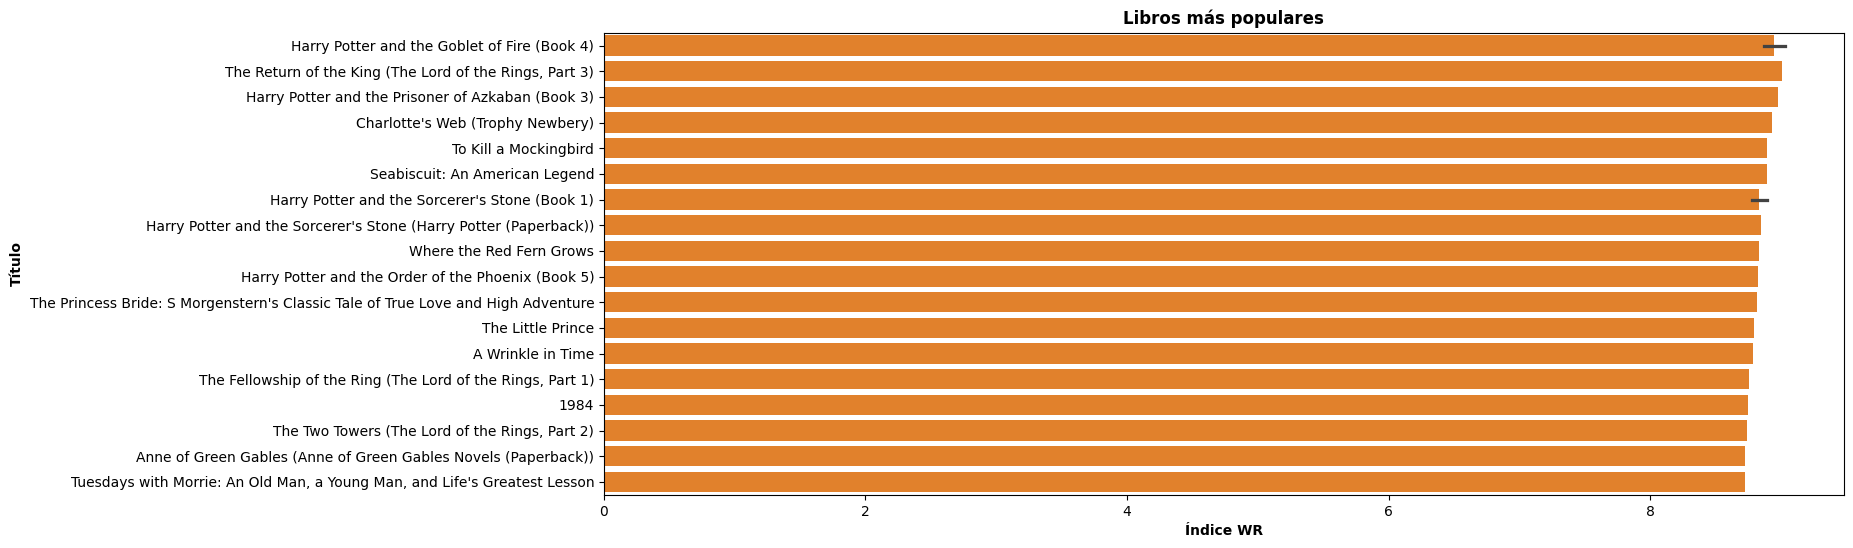

In [13]:
import seaborn as sns

plt.figure(figsize=(16,6))
ax = sns.barplot(x=book_rating['WR'].head(20), y=book_rating['title'].head(20))

sns.barplot(x='WR',y='title', data=book_rating.head(20))

plt.title('Libros más populares', weight='bold')
plt.xlabel('Índice WR', weight='bold')
plt.ylabel('Título', weight='bold')
plt.show()

In [15]:
book_rating.head(20)

,bookID,meanRating,numRating,title,WR
232,0439139597,9.190476,63,Harry Potter and the Goblet of Fire (Book 4),9.028985
110,0345339738,9.500000,20,"The Return of the King (The Lord of the Rings,...",9.003864
230,0439136350,9.129032,62,Harry Potter and the Prisoner of Azkaban (Book 3),8.973832
33,0064400557,9.218750,32,Charlotte's Web (Trophy Newbery),8.931332
274,0446310786,9.013699,73,To Kill a Mockingbird,8.892963
310,0449005615,9.230769,26,Seabiscuit: An American Legend,8.892109
235,043936213X,9.437500,16,Harry Potter and the Sorcerer's Stone (Book 1),8.889074
233,0439139600,9.114286,35,Harry Potter and the Goblet of Fire (Book 4),8.869243
387,059035342X,8.943182,88,Harry Potter and the Sorcerer's Stone (Harry P...,8.848122
364,0553274295,9.263158,19,Where the Red Fern Grows,8.831584


# Referencias

Charu C. Aggarwal. Recommender Systems: The Textbook. 2016.

Surprise ([artículos de referencia](https://surprise.readthedocs.io/en/stable/notation_standards.html#))
